#### Project Objective

* Understand the trends over time in gross domestic product (GDP) and life expectancy at birth of 6 selected countries.
* Identify the relationship between the GDP and life expectancy of six countries.
* 



#### Data

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


df = pd.read_csv('all_data.csv')
#investigate column names first
print(df.columns)
print('\n')
#preview data
print(df.head())
print(df.tail())
print('\n')
#investigate the info and datatypes for each column
print(df.info()) # This suggest we have no -null data, country is a categorical data.
print('\n')
#Print out unique values
print(df['Country'].value_counts())
a=df['Country'].value_counts()
df_minus_Zimbabwe=df[df.Country != 'Zimbabwe']
df_Zimbabwe=df[df.Country == 'Zimbabwe']


Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           

#### Exploratory Data Analysis

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


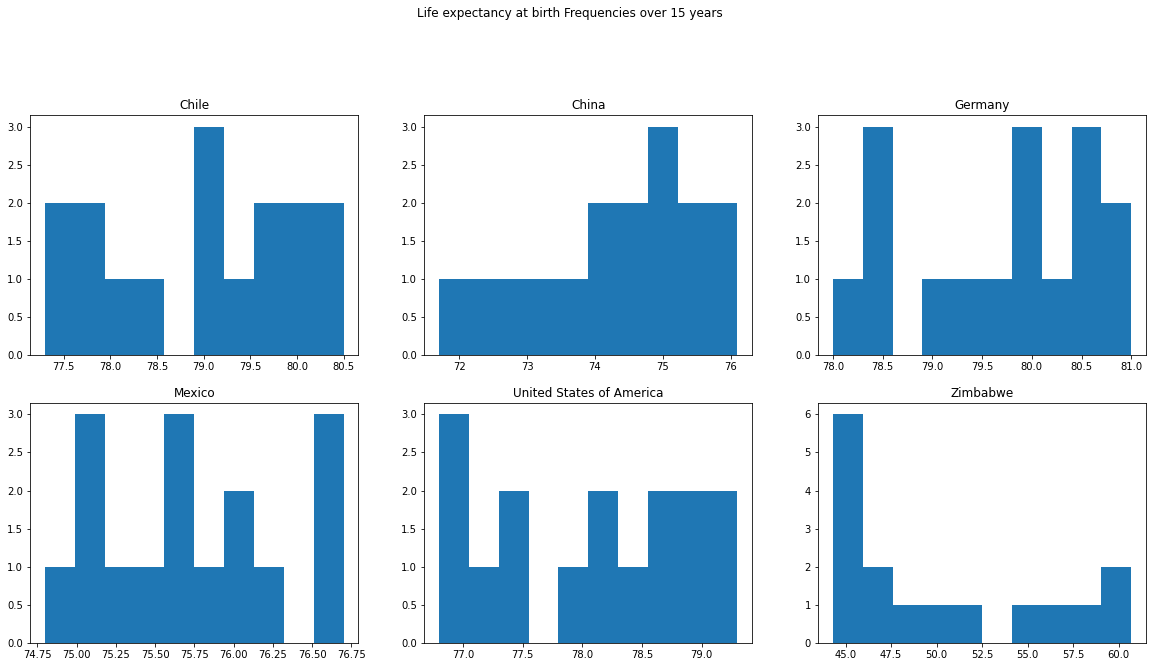

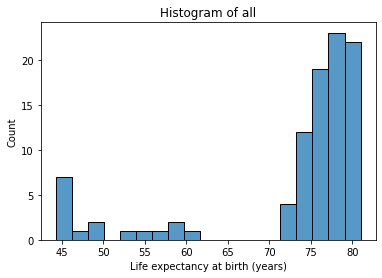

<Figure size 432x288 with 0 Axes>

In [2]:
#Show the distribution of Life Expectancy in each country
counter=1
unique_countries=df.Country.unique()

print(unique_countries)
plt.figure(figsize=(20,15))

for country in unique_countries:
    #print(country)
    df_country=df[df['Country'] == country]
    #print(df_country)
    #df.groupby('Country').mean()
    plt.subplot(3,3,counter)
    plt.title(country)
    plt.hist(df_country["Life expectancy at birth (years)"])
    counter+=1
plt.suptitle('Life expectancy at birth Frequencies over 15 years')
plt.show()
plt.clf()
    
plt.title('Histogram of all')
sns.histplot(df["Life expectancy at birth (years)"])
plt.show()
plt.clf()

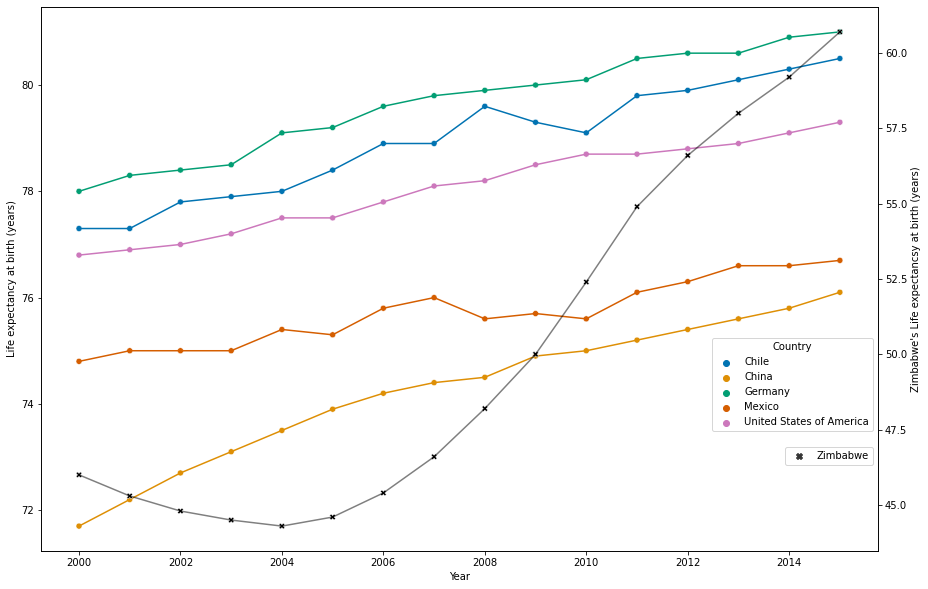

<Figure size 432x288 with 0 Axes>

In [3]:
#Show the life expectancy at birth in a time series plot for each country

plt.figure(figsize=(15,10))
ax=sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe, hue='Country',palette='colorblind')
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe, hue='Country',palette='colorblind',legend=False)
leg = ax.legend(bbox_to_anchor=(1, 0.4),title='Country') #labels=['Chile','China','Germany','Mexico','USA']
leg.texts[4]='USA'

ax2=ax.twinx()
sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax2, style='Country', markers='X',color='#000000' ) #color='black'
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax2,color='#000000',alpha=0.5, legend=False)
plt.ylabel("Zimbabwe's Life expectancsy at birth (years)")
plt.legend(bbox_to_anchor=(1, 0.2))
#ax3=plt.scatter(x=df_Zimbabwe.Year, y=df_Zimbabwe['Life expectancy at birth (years)'],c='black')
#plt.legend(loc='upper left') #This does not work for some reason, must be because it does not get applied to an error bar
#sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df, hue='Country')
plt.show()
plt.clf()


### Trends in Life Expectancy at Birth over a Decade

Construct [Here] a table of Average(median) Life Expectancy over time by each country

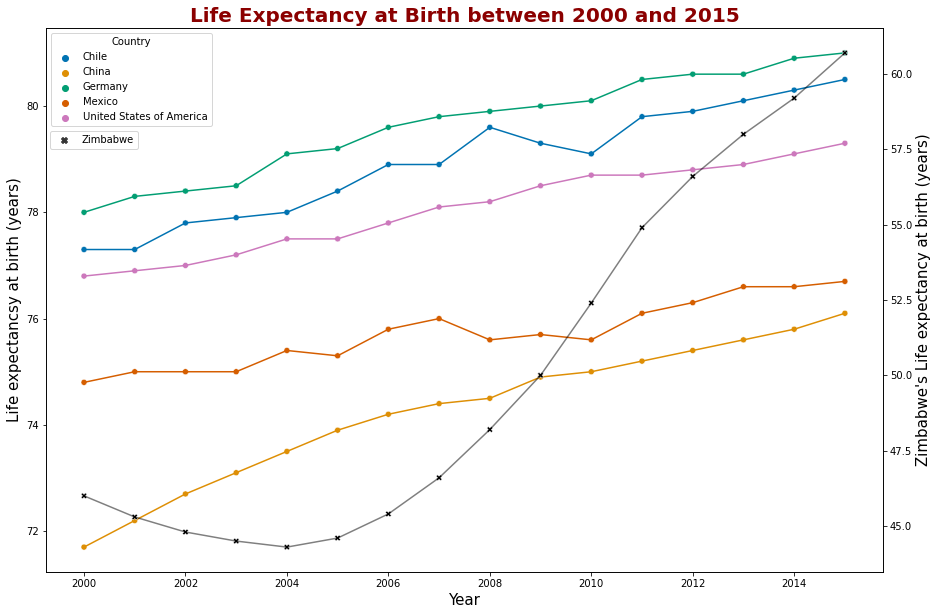

<Figure size 432x288 with 0 Axes>

In [4]:
#Alternative attempt

plt.figure(figsize=(15,10))
ax_1= plt.subplot()
ax_2=ax_1.twinx()

sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe,ax=ax_1, hue='Country',palette='colorblind')
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe,ax=ax_1, hue='Country',palette='colorblind',legend=False)

scat_ax=sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax_2, style='Country', markers='X',color='#000000' ) #color='black'
lplot_ax=sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax_2,color='#000000',alpha=0.5, legend=False)

font1 = {
        'size': 15,
        }

ax_1.set_ylabel("Life expectancsy at birth (years)",fontdict=font1)
ax_1.set_xlabel('Year',fontdict=font1)
ax_2.set_ylabel("Zimbabwe's Life expectancy at birth (years)",fontdict=font1)
#plt.legend()
#ax_1.legend(labels=['Chile','China','Germany','Mexico','USA','Zimbabwe'])
ax_2.legend(bbox_to_anchor=(0.116, 0.82))

font2 = {
        'color':  'darkred',
        'weight': 'semibold',
        'size': 20,
        }
plt.title('Life Expectancy at Birth between 2000 and 2015',fontdict=font2)
plt.savefig('Life Expectancy at Birth between 2000 and 2015.png')
plt.show()
plt.clf()


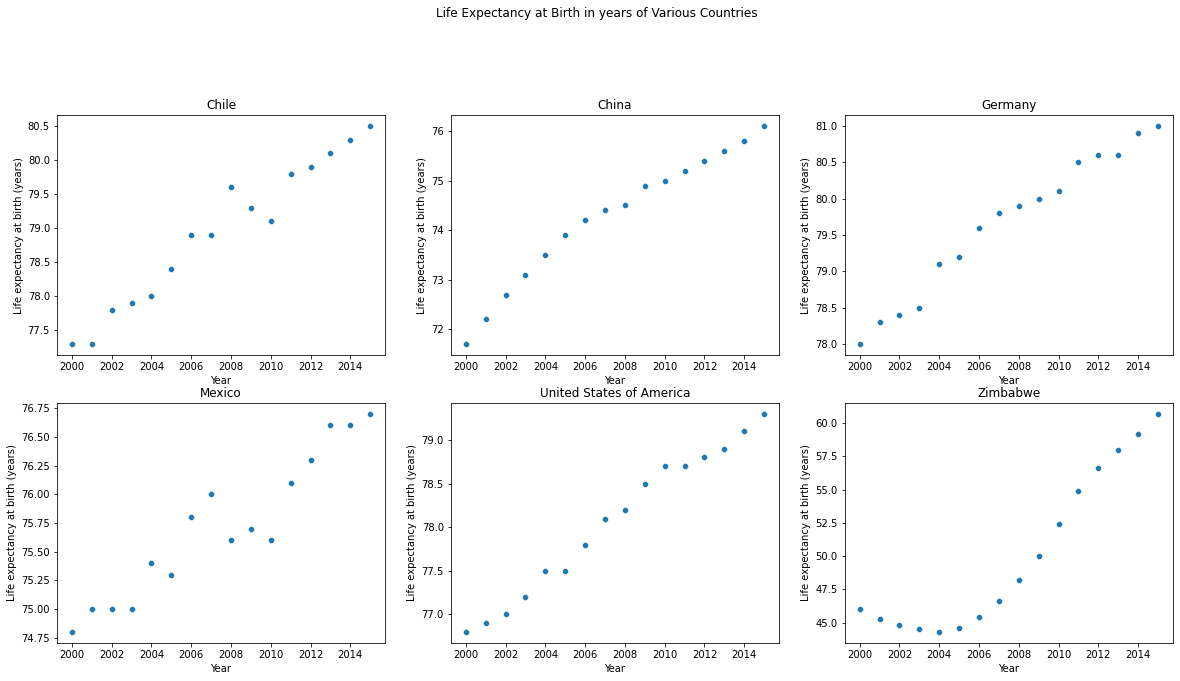

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
counter=1
plt.figure(figsize=(20,15))

for country in unique_countries:
    df_country=df[df['Country'] == country]
    plt.subplot(3,3,counter)
    plt.title(country)
    
    sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df[df.Country == country])
    counter+=1
plt.suptitle('Life Expectancy at Birth in years of Various Countries')
plt.show()
plt.clf()
    
plt.show()
plt.clf()

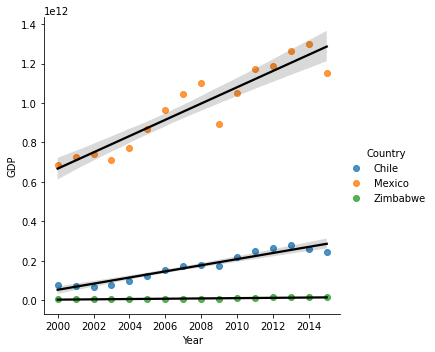

<Figure size 432x288 with 0 Axes>

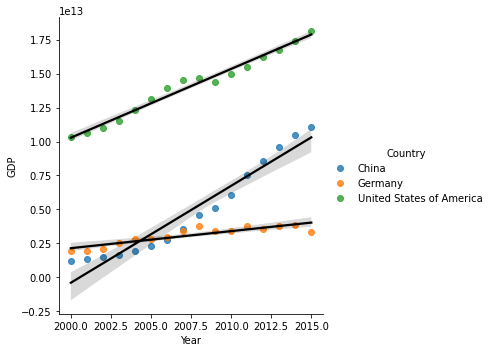

<Figure size 432x288 with 0 Axes>

In [6]:
#Show GDP change over time in a time series plot for each country
#Log scale on the y-axis is good to differentiate the countries at initial year , but it makes it harder to tell apart the changes over time for each country 
df_minus_USA_and_China_and_Germany=df[(df.Country != 'United States of America')&(df.Country != 'China')&(df.Country != 'Germany')]
df_USA_China_Germany=df[(df.Country == 'United States of America')|(df.Country == 'China')|(df.Country == 'Germany')]

sns.lmplot(x='Year', y='GDP', data = df_minus_USA_and_China_and_Germany,hue='Country', line_kws={'color': 'black'})
plt.show()
plt.clf()

sns.lmplot(x='Year', y='GDP', data = df_USA_China_Germany,hue='Country', line_kws={'color': 'black'})
plt.show()
plt.clf()




['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
['Chile' 'China' 'Germany' 'Mexico' 'United States of America']


/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3342656206.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3342656206.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3342656206.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3342656206.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3342656206.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j

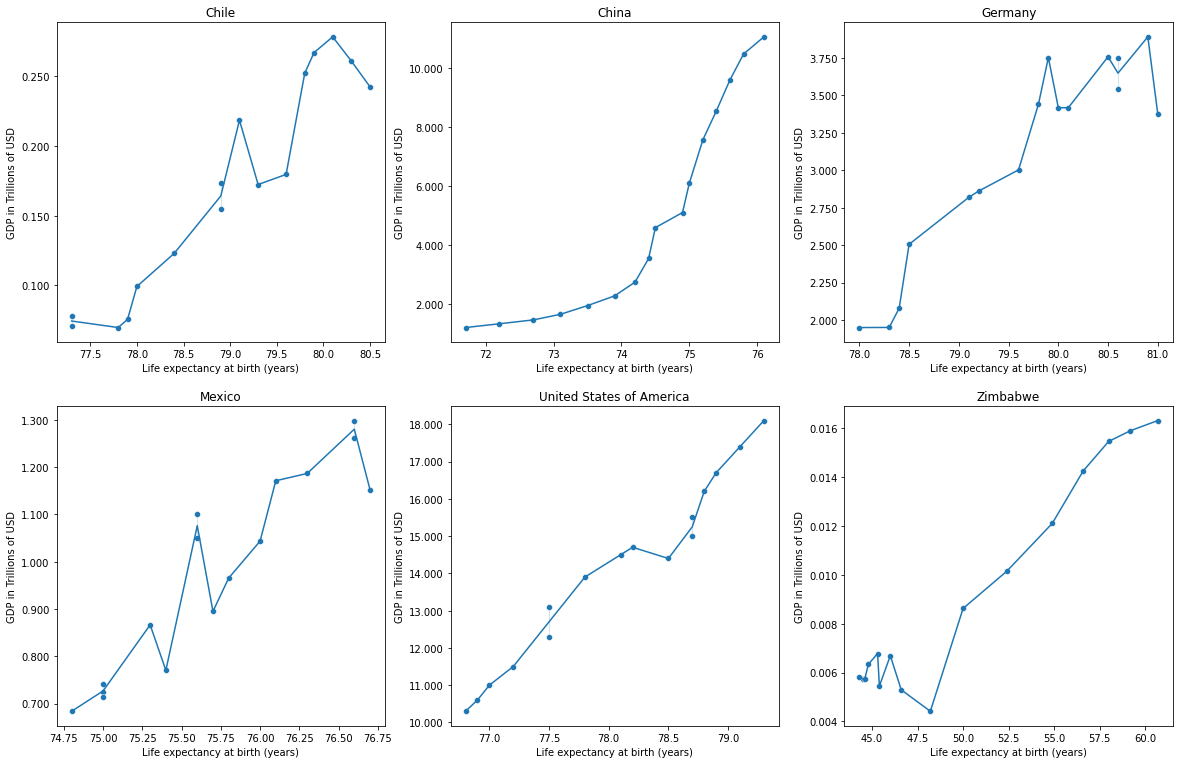

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting GDP vs life expectancy for each country
counter=1
plt.figure(figsize=(20,20))
print(unique_countries)
countries_minus_Zimbabwe=unique_countries[unique_countries != 'Zimbabwe']
print(countries_minus_Zimbabwe)
for country in unique_countries:
    ax= plt.subplot(3,3,counter)
    sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    scat_ax_a=sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    ylabels_1 = ['{:,.3f}'.format(y) for y in scat_ax_a.get_yticks()/(10**12)]
    scat_ax_a.set_yticklabels(ylabels_1)
    scat_ax_a.set_ylabel('GDP in Trillions of USD')

    plt.title(country)
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2e'))
    counter+=1
plt.savefig('Gross Domestic Product in relation to Life Expectancy.png')
plt.show()
plt.clf()

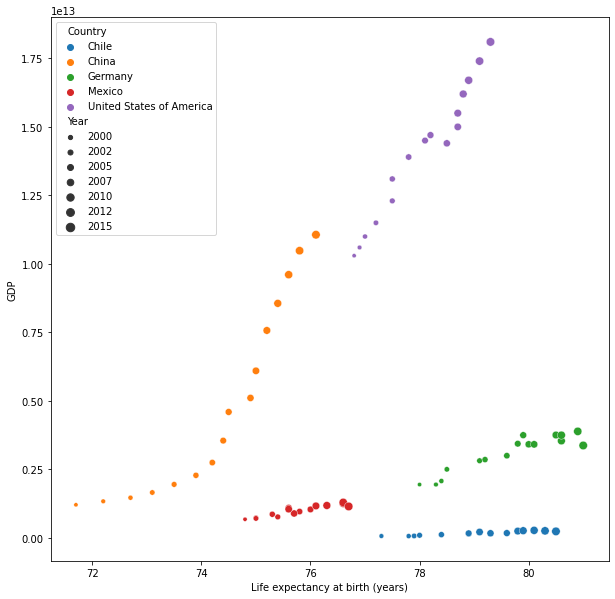

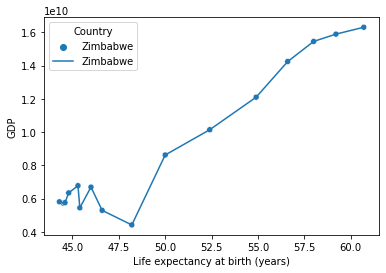

<Figure size 432x288 with 0 Axes>

In [8]:
#Plotting GDP vs life expectancy overall
plt.figure(figsize=(10,10))
df_life_above_65=df[df['Life expectancy at birth (years)']>65]
sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df_life_above_65, hue='Country',size='Year')

plt.show()
plt.clf()

plt.subplot()
sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == 'Zimbabwe'], hue='Country')
sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == 'Zimbabwe'], hue='Country')
plt.show()
plt.clf()

/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3855728865.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat.set_yticklabels(ylabels)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_15270/3855728865.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat2.set_yticklabels(ylabels2)


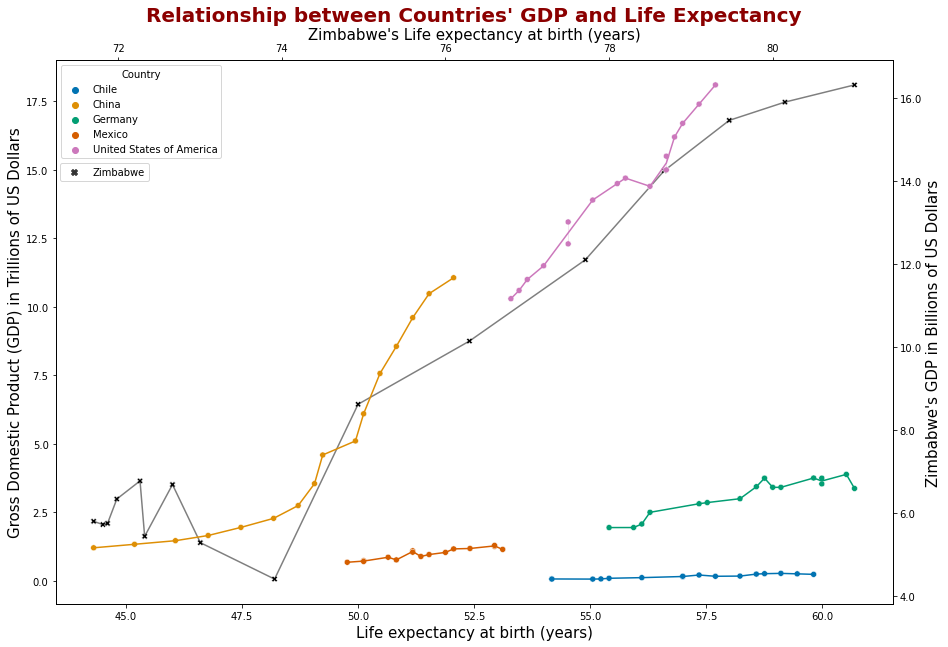

<Figure size 432x288 with 0 Axes>

In [19]:
#Alternative GDP vs Life Expectancy

#Font configurations to be used for axis texts
font3 = {
        'size': 15,
        }


plt.figure(figsize=(15,10))
ax3= plt.subplot()
ax4=ax3.twinx()
ax5=ax3.twiny()

#Scatter and line plots of 5 countries on the primary y(left) and x(bottom) axes
scat= sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df_life_above_65, hue='Country',palette='colorblind')
lplot= sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df_life_above_65, hue='Country', palette='colorblind',legend= False)
ax3.set_ylabel("Gross Domestic Product (GDP) in Trillions of US Dollars", fontdict=font3)
ax3.set_xlabel("Life expectancy at birth (years)", fontdict=font3)
scat.legend(title='Country', loc='upper left')
ylabels = ['{:,.1f}'.format(y) for y in scat.get_yticks()/(10**12)]
scat.set_yticklabels(ylabels)

#Zimbabwe's plots on the secondary y(right) and x(top) axes
scat2= sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df_Zimbabwe, style='Country', ax=ax4, markers='X', color='#000000')
lplot2= sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df_Zimbabwe, style='Country', ax=ax4, color='#000000', alpha=0.5,legend=False)
ax4.set_ylabel("Zimbabwe's GDP in Billions of US Dollars", fontdict=font3)
ax5.set_xlabel("Zimbabwe's Life expectancy at birth (years)", fontdict=font3)
ax4.legend(bbox_to_anchor=(0.117, 0.82))
ylabels2 = ['{:,.1f}'.format(y2) for y2 in scat2.get_yticks()/(10**9)]
scat2.set_yticklabels(ylabels2)


#Font configurations to be used for the title
font4 = {
        'color':  'darkred',
        'weight': 'semibold',
        'size': 20,
        }
plt.title("Relationship between Countries' GDP and Life Expectancy",fontdict=font4)

plt.savefig("Relationship between Countries' GDP and Life Expectancy.png")
plt.show()
plt.clf()



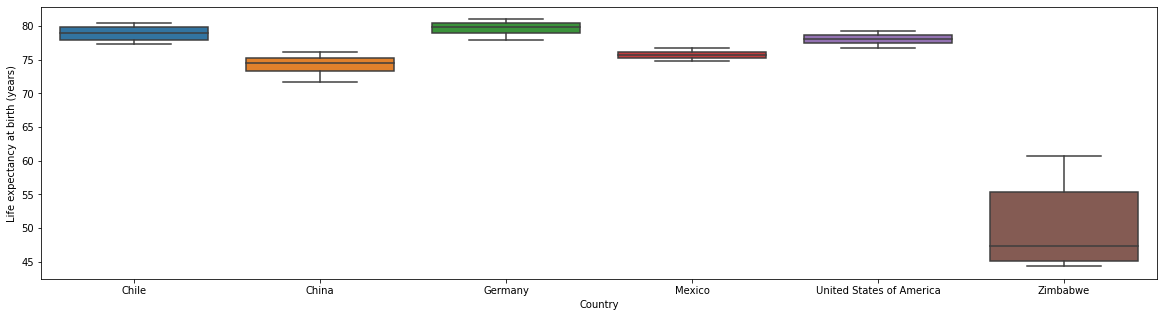

<Figure size 432x288 with 0 Axes>

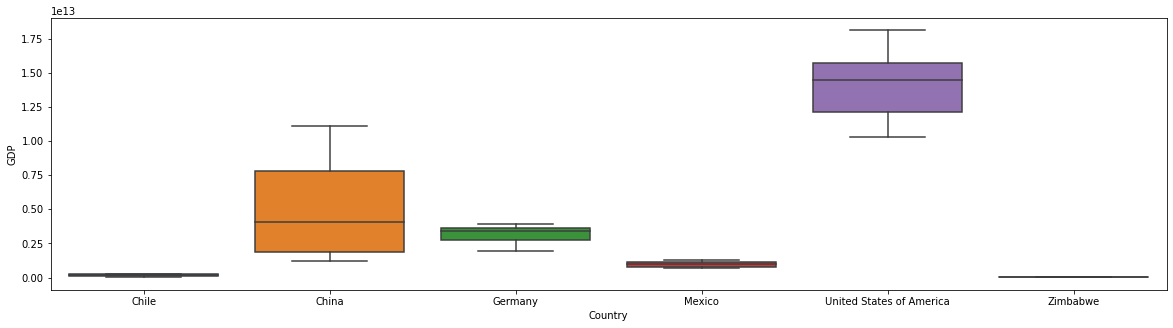

<Figure size 432x288 with 0 Axes>

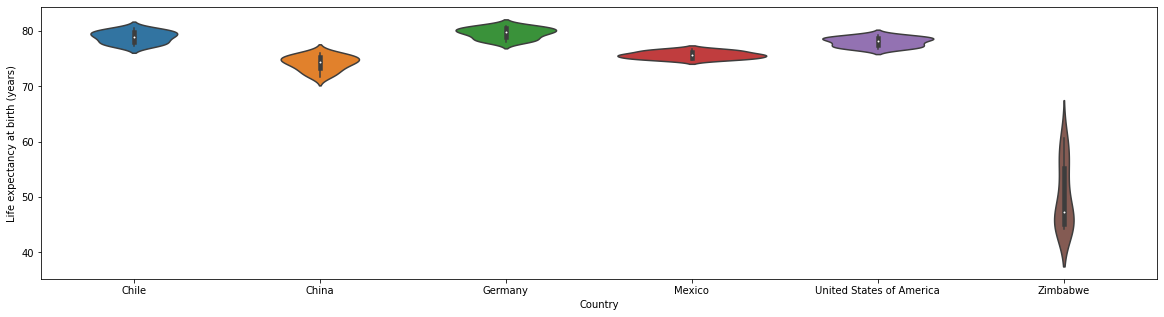

<Figure size 432x288 with 0 Axes>

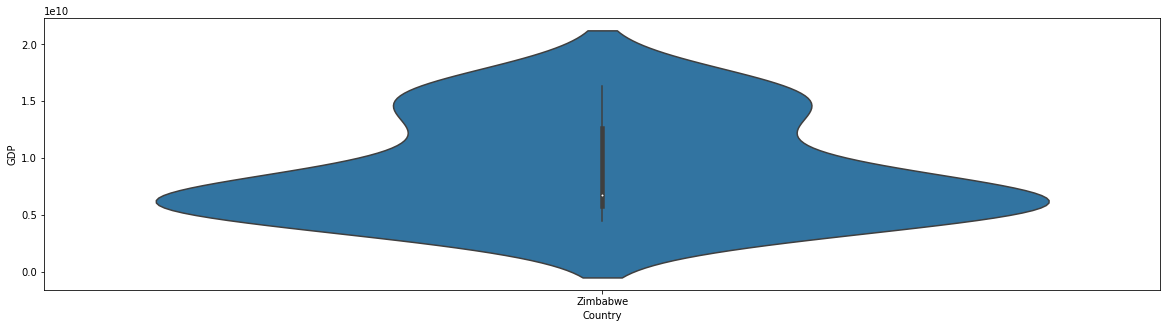

<Figure size 432x288 with 0 Axes>

In [10]:
#GDP and Life Expectancy boxplots for each country
plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='GDP',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='GDP',data=df[df.Country=='Zimbabwe'])
plt.show()
plt.clf()